In [1]:
# correlate all plebiscites among each other 

In [2]:
# module imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# load all plebiscite data into pandas dataframes
wassertisch_raw = pd.read_csv("data/Abstimmung_Wassertisch_2011.csv")
energietisch_raw = pd.read_csv("data/Abstimmung_Energietisch_2013.csv")
tempelhof_raw = pd.read_csv("data/Abstimmung_Tempelhof_2014.csv")
dwe_raw = pd.read_csv("data/Abstimmung_DWE.csv")

In [4]:
# clean all dataframes

In [5]:
# Wassertisch
# create unique district ID by concatenating "Bezirksnummer" and "Stimmberzirk"
wassertisch_raw["unique_district"] = wassertisch_raw["Bezirksnummer"].map(str) + wassertisch_raw["Stimmbezirk"].map(str)
# calculate share of yes votes
wassertisch_raw["anteil_ja_wa"] = wassertisch_raw["JA"] / wassertisch_raw["gültige_stimmen"]
# drop all fields but the necessary ones
wassertisch = wassertisch_raw.filter(['unique_district', 'anteil_ja_wa'], axis=1)

In [6]:
# Energietisch
# create unique district ID by concatenating "Bezirksnummer" and "Stimmberzirk"
energietisch_raw["unique_district"] = energietisch_raw["Bezirksnummer"].map(str) + energietisch_raw["Stimmbezirk"].map(str)
# drop all fields but the necessary ones
energietisch_raw["anteil_ja_en"] = energietisch_raw["JA"] / energietisch_raw["gültige_stimmen"]
energietisch = energietisch_raw.filter(['unique_district', 'anteil_ja_en'], axis=1)

In [7]:
# Tempelhof
# add up the different types of eligible to vote
tempelhof_raw["stimmberechtigte_insgesamt"] = (
	tempelhof_raw["Stimmberechtigte A1"]
	+ tempelhof_raw["Stimmberechtigte A2"]
	+ tempelhof_raw["Stimmberechtigte A3"]
)
# rename field to conform with the other plebiscites
tempelhof_raw["gültige_stimmen"] = tempelhof_raw["1 Gültige Stimmen"]
# create unique district ID by concatenating "Bezirksnummer" and "Stimmberzirk"
tempelhof_raw["unique_district"] = tempelhof_raw["Bezirksnummer"].map(str) + tempelhof_raw["Stimmbezirk"].map(str)
# drop all fields but the necessary ones
tempelhof_raw["anteil_ja_thf"] = tempelhof_raw["JA"] / tempelhof_raw["gültige_stimmen"]
tempelhof = tempelhof_raw.filter(['unique_district', 'anteil_ja_thf'], axis=1)

In [8]:
# DWE
# rename fields to conform with the other plebiscites
dwe_raw["Stimmbezirk"] = dwe_raw["Wahlbezirk"]
dwe_raw["stimmberechtigte_insgesamt"] = dwe_raw["Wahlberechtigte insgesamt"]
dwe_raw["JA"] = dwe_raw["Stimmabgabe Volksentscheid: Ja"]
dwe_raw["NEIN"] = dwe_raw["Stimmabgabe Volksentscheid: Nein"]
dwe_raw["gültige_stimmen"] = dwe_raw["Gültige Stimmen"]
dwe_raw["anteil_ja_dwe"] = dwe_raw["JA"] / dwe_raw["gültige_stimmen"]
# create unique district ID by concatenating "Bezirksnummer" and "Stimmberzirk"
dwe_raw["unique_district"] = dwe_raw["Bezirksnummer"].map(str) + dwe_raw["Stimmbezirk"].map(str)
# drop all fields but the necessary ones
dwe = dwe_raw.filter(['unique_district', 'anteil_ja_dwe', 'Bezirksname'], axis=1)

In [9]:
# combine all data into one df
merged = energietisch.merge(
    wassertisch,
    how='inner',
    on='unique_district',
)
merged = merged.merge(
    tempelhof,
    how='inner',
    on='unique_district',
)
merged = merged.merge(
    dwe,
    how='inner',
    on='unique_district',
)

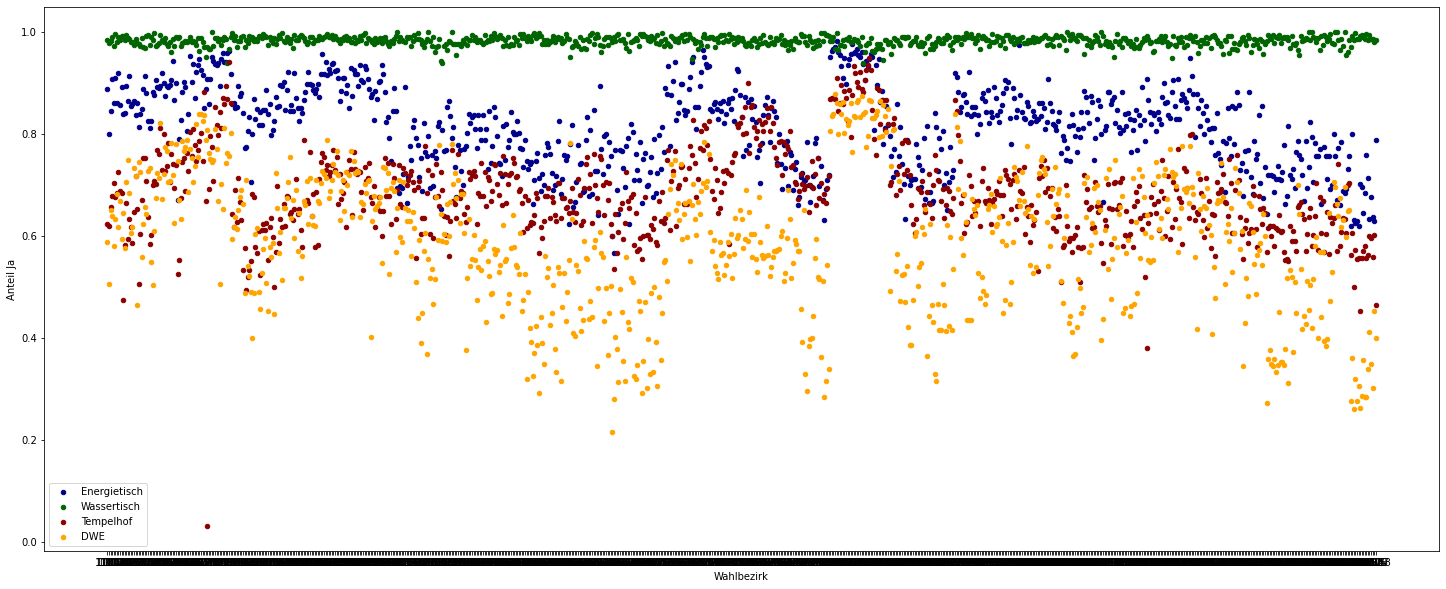

In [10]:
# create a scatterplot for all results
ax = merged.plot.scatter(x="unique_district", y="anteil_ja_en", color="DarkBlue", label="Energietisch", figsize=(25,10))
merged.plot.scatter(x="unique_district", y="anteil_ja_wa", color="DarkGreen", label="Wassertisch", ax=ax);
merged.plot.scatter(x="unique_district", y="anteil_ja_thf", color="DarkRed", label="Tempelhof", ax=ax);
merged.plot.scatter(x="unique_district", y="anteil_ja_dwe", color="Orange", label="DWE", ax=ax, xlabel="Wahlbezirk", ylabel="Anteil Ja");

In [11]:
# Correlation matrix with Pearson's correlation coefficient

merged_cor = merged[[    
    'anteil_ja_en',
    'anteil_ja_wa',
    'anteil_ja_thf',
    'anteil_ja_dwe',
]]

corr = merged_cor.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_caption("Korrelationsmatrix (Pearson) für alle Volksentscheide")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:2em; color: black;'
 }])

In [12]:
# Correlation matrix with Spearman's correlation coefficient

corr = merged_cor.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_caption("Korrelationsmatrix (Spearman) für alle Volksentscheide")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:2em; color: black;'
 }])